In [321]:
import pandas as pd
import numpy as np
import re
#import pygwalker as pyg

## SET & RESET

In [322]:
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)
pd.set_option('display.max_colwidth',None)

In [54]:
#pd.reset_option('display.max_rows')
#pd.reset_option('display.max_columns')
#pd.reset_option('display.max_colwidth')

In [323]:
# Mounting google drive account in colab

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [324]:
df = pd.read_csv('/content/drive/MyDrive/Capstone_Project_REAL_ESTATE/gurgaon_real_estate_cleaned_ver1.csv')

In [325]:
df.head(2)

property_type            society     sector  price  price_per_sqft    area  \
0          flat  dlf regal gardens  sector 90   1.26          7403.0  1702.0   
1          flat       tulip violet  sector 69   1.72          8730.0  1970.0   

                                                                    areaWithType  \
0  Super Built up area 1702(158.12 sq.m.)Carpet area: 1500 sq.ft. (139.35 sq.m.)   
1                                         Super Built up area 1970(183.02 sq.m.)   

   bedRoom  bathroom balcony additionalRoom  floorNum      facing  \
0        3         3       3         others       6.0  North-East   
1        4         4       1  not available      12.0  North-East   

     agePossession  \
0  1 to 5 Year Old   
1  1 to 5 Year Old   

                                                                                                                                                                                                                                                                                                                                                                                                                                                        nearbyLocations  \
0  ['SS Omnia, Sector 86', 'Numberdar market, IMT Manesar', "Sodhi's Supermarket, Sector 82", 'RPS International School', 'RHM Public School', 'ICICI Bank ATM, Sector 86', 'Silver Streak Multi Speciality', 'Aarvy Healthcare Super Speciality', 'Miracles Apollo Cradle Hospital', 'HDFC Bank, Pataudi Rd', 'Canara Bank - Nawada Fatehpur', 'State Bank of India', 'Minda Industries Nawada Fatehpur', 'Holiday Inn Gurugram Sector 90', 'M3M SCO Shop cum Office']   
1                                                                                                                                                                                    ['Airia Mall Sector 68', 'Southern Peripheral Road', 'Golf Course Extension Rd', 'Imperio School', 'DPG Institute of Technology', 'Ektaa Hospitals', 'Indira Gandhi International Airport', 'Vipul Trade Business Centre', 'Radisson Hotel Gurugram', 'SkyJumper Trampoline Park']   

                                                                                                                                                                                                                                                         furnishDetails  \
0         ['3 Wardrobe', '5 Fan', '1 Exhaust Fan', '3 Geyser', '9 Light', '1 Chimney', '5 AC', '1 Modular Kitchen', 'No Bed', 'No Curtains', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']   
1  ['1 Modular Kitchen', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Light', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']   

                                                                                                                                                                                                                                                                                                                                       features  
0                                                                                                                                                                                                                                                              ['Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Park', 'Visitor Parking']  
1  ['Power Back-up', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Piped-gas', 'Visitor Parking', 'Swimming Pool', 'Park', 'Natural Light', 'Airy Rooms', 'Low Density Society', 'Shopping Centre', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center']

In [58]:
#pyg.walk(df)

In [326]:
df.columns

Index(['property_type', 'society', 'sector', 'price', 'price_per_sqft', 'area',
       'areaWithType', 'bedRoom', 'bathroom', 'balcony', 'additionalRoom',
       'floorNum', 'facing', 'agePossession', 'nearbyLocations',
       'furnishDetails', 'features'],
      dtype='object')

In [327]:
df.duplicated().sum()

0

In [328]:
df.isnull().sum()

property_type        0
society              1
sector               0
price                0
price_per_sqft       0
area                 0
areaWithType         0
bedRoom              0
bathroom             0
balcony              0
additionalRoom       0
floorNum            21
facing               0
agePossession        1
nearbyLocations    199
furnishDetails     991
features           667
dtype: int64

In [329]:
df.shape

(3817, 17)

# 1) 'areawithtype' feature

In [330]:
df['areaWithType'].value_counts()

areaWithType
Plot area 360(301.01 sq.m.)                                                                                                     37
Plot area 300(250.84 sq.m.)                                                                                                     27
Plot area 200(167.23 sq.m.)                                                                                                     20
Plot area 270(225.75 sq.m.)                                                                                                     18
Plot area 502(419.74 sq.m.)                                                                                                     18
Plot area 900(83.61 sq.m.)                                                                                                      17
Super Built up area 1578(146.6 sq.m.)                                                                                           17
Super Built up area 1950(181.16 sq.m.)Carpet area: 1161 sq.ft. (107.86

In [331]:
df.isnull().sum()

property_type        0
society              1
sector               0
price                0
price_per_sqft       0
area                 0
areaWithType         0
bedRoom              0
bathroom             0
balcony              0
additionalRoom       0
floorNum            21
facing               0
agePossession        1
nearbyLocations    199
furnishDetails     991
features           667
dtype: int64

In [332]:
df['areaWithType'] = df['areaWithType'].apply(lambda x: x.replace(' sq.ft. ','').strip())

In [333]:
df['areaWithType'] = df['areaWithType'].apply(lambda x: x.replace(' sq.yards ','').strip())

In [334]:
df['areaWithType'] = df['areaWithType'].str.lower()


In [ ]:
df['areaWithType']

In [335]:

def update_superbuilt_up_area(x):
  if ('sq.m.' in x) and ('plot' not in x):
      match = re.search(r'super built up area \d+\.?\d*\s*\((\d+\.?\d*) sq.m.\)',x)
      if match:
         return round(float(match.group(1))*10.76 + 0.5)
      return None


In [336]:

def update_built_up_area(x):
  if ('sq.m.' in x) and ('plot' not in x):
      match = re.search(r'built up area: \d+\.?\d*\s*\((\d+\.?\d*) sq.m.\)',x)
      if match:
         return round(float(match.group(1))*10.76 + 0.5)
      return None


In [337]:

def update_carpet_area(x):
  if ('sq.m.' in x) and ('plot' not in x):
      match = re.search(r'carpet area: \d+\.?\d*\s*\((\d+\.?\d*) sq.m.\)',x)
      if match:
         return round(float(match.group(1))*10.76 + 0.5)
      return None


In [338]:

def update_plot_area(x):
  if ('sq.m.' in x) and ('plot' in x):
    match = re.search(r'plot area \d+\.?\d*\s*\((\d+\.?\d*) sq.m.\)',x)
    if match:
      return round(float(match.group(1))*10.76 + 0.5)



In [339]:

def update_plot_carpet_area(x):
  if ('sq.m.' in x) and ('plot' in x):
    match = re.search(r'carpet area: \d+\.?\d*\s*\((\d+\.?\d*) sq.m.\)',x)
    if match:
       return round(float(match.group(1))*10.76 + 0.5)



In [340]:
df['super_builtup_area'] = df['areaWithType'].apply(update_superbuilt_up_area)

In [341]:
df['builtup_area'] = df['areaWithType'].apply(update_built_up_area)

In [342]:
df['carpet_area'] = df['areaWithType'].apply(update_carpet_area)

In [257]:
df_plot = df[df['areaWithType'].str.contains('plot')]

In [343]:
df_plot.shape

(750, 20)

In [344]:
df_plot['builtup_area'] = df_plot['areaWithType'].apply(update_plot_area)

<ipython-input-344-e749d58f5122>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plot['builtup_area'] = df_plot['areaWithType'].apply(update_plot_area)


In [345]:
df_plot['carpet_area'] = df_plot['areaWithType'].apply(update_plot_carpet_area)

<ipython-input-345-787f86f3869f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plot['carpet_area'] = df_plot['areaWithType'].apply(update_plot_carpet_area)


In [346]:
df.update(df_plot)

In [347]:
df[~df['areaWithType'].str.contains('plot')][['area','areaWithType','super_builtup_area','builtup_area','carpet_area']]

area  \
0       1702.0   
1       1970.0   
2       2779.0   
3        969.0   
4       2950.0   
5        160.0   
6       1630.0   
7       1950.0   
9       1750.0   
11      2350.0   
12      6000.0   
13      1582.0   
15      1800.0   
16      1738.0   
17      3150.0   
18       396.0   
20      1020.0   
22      1877.0   
23      1537.0   
24       735.0   
25      2605.0   
26      1250.0   
27      1320.0   
28      2092.0   
29       493.0   
30      1550.0   
31      2300.0   
32      1140.0   
33      2200.0   
34       525.0   
35      1640.0   
36      1479.0   
37      1997.0   
38      2727.0   
39      2132.0   
40      2350.0   
41      1766.0   
42       722.0   
44      1640.0   
45      1650.0   
46      1260.0   
47      1457.0   
48      3731.0   
50       700.0   
51      1730.0   
53      1395.0   
54      2812.0   
55       562.0   
56      3829.0   
57      1727.0   
58      2625.0   
59      1848.0   
61      1250.0   
62      1154.0   
63      1200.0   
64      1300.0   
65      1825.0   
67      2464.0   
68      1300.0   
69       472.0   
70      1100.0   
71      2903.0   
73       822.0   
74      1300.0   
75      1151.0   
76      1400.0   
77      2329.0   
78      2120.0   
79      3482.0   
80      1743.0   
82      2100.0   
83      1741.0   
84       996.0   
86      3200.0   
87       950.0   
88       903.0   
89       545.0   
90      4000.0   
92      1950.0   
93      1616.0   
94      1484.0   
95      1244.0   
96      1296.0   
97      2585.0   
99      2300.0   
100      531.0   
102     1829.0   
104      690.0   
107     1459.0   
108      654.0   
109     2010.0   
110     4500.0   
111     1960.0   
114      565.0   
115     2450.0   
116      362.0   
117      791.0   
118     1836.0   
119     1400.0   
120     1314.0   
121     2200.0   
122     1968.0   
125     1023.0   
126     1534.0   
127     1505.0   
128     4739.0   
129     2000.0   
130     1976.0   
131     1956.0   
132     1250.0   
133     2042.0   
134      780.0   
135      480.0   
136     2103.0   
137     1338.0   
139     1620.0   
141      481.0   
142     1383.0   
143     2286.0   
144     1968.0   
145     1890.0   
147     1350.0   
149      711.0   
151     2495.0   
152     1550.0   
153      832.0   
154     2215.0   
155      554.0   
157      830.0   
158     2768.0   
159     1100.0   
162      930.0   
163     1447.0   
164      649.0   
165     1342.0   
167     1828.0   
168      650.0   
169     2350.0   
170     1107.0   
171      894.0   
172     1578.0   
175    58228.0   
177     1325.0   
179     2091.0   
180     1935.0   
182     1465.0   
184     2191.0   
185      583.0   
187     1889.0   
188     1258.0   
189     1917.0   
190      602.0   
191     2191.0   
193     2361.0   
194     2000.0   
195     1472.0   
196     1922.0   
197     1080.0   
198     4200.0   
199     1700.0   
200     4739.0   
201     2400.0   
202     1640.0   
203     5350.0   
204     2048.0   
205      661.0   
206     1245.0   
207     1110.0   
208     1264.0   
209     1120.0   
210     3150.0   
211     1582.0   
212     4343.0   
213     1620.0   
215     2000.0   
216     2244.0   
217      360.0   
218     1966.0   
219     1572.0   
220     2300.0   
221     1755.0   
223      410.0   
224     2045.0   
225      357.0   
228     2404.0   
230     1050.0   
231     1300.0   
232     1530.0   
233     1430.0   
235     1900.0   
236     2095.0   
238     1756.0   
240     3240.0   
241     1133.0   
242     3008.0   
243     1259.0   
244     2104.0   
245     3556.0   
246     1261.0   
247     1274.0   
248     1362.0   
249     3150.0   
250     2500.0   
251      900.0   
252     1360.0   
253     1350.0   
254     1100.0   
255     1640.0   
257     1500.0   
258      750.0   
259     1457.0   
260     2025.0   
263     1447.0   
264     1125.0   
265     2100.0   
266     1920.0   
267     1059.0   
270     1360.0   
271     1150.0   
272     1283.0   
273      745.0   
274     2191.0

In [264]:
df.iloc[:,[0,6,17,18,19]]

property_type  \
0             flat   
1             flat   
2             flat   
3             flat   
4             flat   
5            house   
6             flat   
7             flat   
8            house   
9             flat   
10           house   
11            flat   
12           house   
13            flat   
14           house   
15            flat   
16            flat   
17            flat   
18            flat   
19           house   
20            flat   
21           house   
22            flat   
23            flat   
24            flat   
25            flat   
26            flat   
27            flat   
28            flat   
29            flat   
30            flat   
31            flat   
32            flat   
33            flat   
34            flat   
35            flat   
36            flat   
37            flat   
38            flat   
39            flat   
40            flat   
41            flat   
42            flat   
43           house   
44            flat   
45            flat   
46            flat   
47            flat   
48            flat   
49           house   
50            flat   
51            flat   
52           house   
53            flat   
54            flat   
55            flat   
56            flat   
57            flat   
58            flat   
59            flat   
60           house   
61            flat   
62            flat   
63            flat   
64            flat   
65            flat   
66           house   
67            flat   
68            flat   
69           house   
70            flat   
71            flat   
72           house   
73            flat   
74            flat   
75            flat   
76            flat   
77            flat   
78            flat   
79            flat   
80           house   
81           house   
82            flat   
83            flat   
84            flat   
85           house   
86            flat   
87            flat   
88            flat   
89            flat   
90           house   
91           house   
92            flat   
93            flat   
94            flat   
95            flat   
96            flat   
97            flat   
98           house   
99            flat   
100           flat   
101          house   
102           flat   
103          house   
104           flat   
105          house   
106          house   
107           flat   
108           flat   
109           flat   
110          house   
111           flat   
112          house   
113          house   
114          house   
115           flat   
116           flat   
117           flat   
118           flat   
119           flat   
120           flat   
121           flat   
122           flat   
123          house   
124          house   
125           flat   
126           flat   
127           flat   
128           flat   
129           flat   
130           flat   
131           flat   
132           flat   
133           flat   
134           flat   
135           flat   
136           flat   
137           flat   
138          house   
139           flat   
140          house   
141           flat   
142           flat   
143           flat   
144           flat   
145           flat   
146          house   
147           flat   
148          house   
149           flat   
150          house   
151           flat   
152           flat   
153           flat   
154           flat   
155           flat   
156          house   
157           flat   
158           flat   
159           flat   
160          house   
161          house   
162           flat   
163           flat   
164           flat   
165           flat   
166          house   
167           flat   
168           flat   
169           flat   
170           flat   
171           flat   
172           flat   
173          house   
174          house   
175           flat   
176          house   
177           flat   
178          house   
179           flat   
180           flat   
1

In [83]:
#match = re.search(r'Super Built up area \d+(?!ignore)\((\d+\.?\d*) sq.m.\)','Super Built up area 1365(126.81 sq.m.)')

#negative lookahead assertion in regex was used

In [348]:
df.isnull().sum()

property_type            0
society                  1
sector                   0
price                    0
price_per_sqft           0
area                     0
areaWithType             0
bedRoom                  0
bathroom                 0
balcony                  0
additionalRoom           0
floorNum                21
facing                   0
agePossession            1
nearbyLocations        199
furnishDetails         991
features               667
super_builtup_area    1926
builtup_area          2030
carpet_area           1910
dtype: int64

In [376]:
df[df['super_builtup_area'].isnull() & df['areaWithType'].str.contains('super')][['area','areaWithType','super_builtup_area']]

Empty DataFrame
Columns: [area, areaWithType, super_builtup_area]
Index: []

In [350]:
df.loc[1171,'super_builtup_area'] = 89*10.76
df.loc[2981,'super_builtup_area'] = 161*10.76
df.loc[926,'super_builtup_area'] = 145*10.76

In [351]:
df.loc[3810,'super_builtup_area'] = 145*10.76

In [375]:
df[df['builtup_area'].isnull() & df['areaWithType'].str.contains('built') & (~df['areaWithType'].str.contains('super'))][['area','areaWithType','super_builtup_area','builtup_area']]

Empty DataFrame
Columns: [area, areaWithType, super_builtup_area, builtup_area]
Index: []

In [353]:

df.loc[645,'builtup_area'] = 75*10.76
df.loc[653,'builtup_area'] = 60*10.76
df.loc[1358,'builtup_area'] = 170*10.76
df.loc[1874,'builtup_area'] = 97*10.76
df.loc[2236,'builtup_area'] = 111.48*10.76
df.loc[3571,'builtup_area'] = 118*10.76
df.loc[3579,'builtup_area'] = 129.42*10.76


In [374]:
df[df['carpet_area'].isnull() & df['areaWithType'].str.contains('carpet_area')][['area','areaWithType','super_builtup_area','builtup_area']]

Empty DataFrame
Columns: [area, areaWithType, super_builtup_area, builtup_area]
Index: []

In [372]:
df_nan = df[df['carpet_area'].isnull() & df['super_builtup_area'].isnull() & df['builtup_area'].isnull()][['price','price_per_sqft','area','areaWithType','super_builtup_area','builtup_area','carpet_area']]

In [373]:
df_nan

Empty DataFrame
Columns: [price, price_per_sqft, area, areaWithType, super_builtup_area, builtup_area, carpet_area]
Index: []

In [363]:
def fill_nan_values_carpet(x):
  m1 = re.search('carpet area: (\d+\.?\d*)',x)
  if m1:
    return round(float(m1.group(1)) + 0.5)



In [364]:
def fill_nan_values_plot(x):
  m2 = re.search('plot area (\d+\.?\d*)',x)
  if m2:
    return round(float(m2.group(1)) + 0.5)


In [365]:
df_nan['carpet_area'] = df_nan['areaWithType'].apply(fill_nan_values_carpet)

In [366]:
df_nan['builtup_area'] = df_nan['areaWithType'].apply(fill_nan_values_plot)

In [367]:
df.update(df_nan)

In [371]:
df.isnull().sum()

property_type            0
society                  1
sector                   0
price                    0
price_per_sqft           0
area                     0
areaWithType             0
bedRoom                  0
bathroom                 0
balcony                  0
additionalRoom           0
floorNum                21
facing                   0
agePossession            1
nearbyLocations        199
furnishDetails         991
features               667
super_builtup_area    1923
builtup_area          2018
carpet_area           1896
dtype: int64

# 2) 'additional rooms' feature

In [377]:
df['additionalRoom'].value_counts()

additionalRoom
not available                                    1609
servant room                                      692
study room                                        243
others                                            231
pooja room                                        169
store room                                        105
study room,servant room                            97
pooja room,servant room                            84
pooja room,study room,servant room,store room      71
servant room,others                                55
pooja room,study room,servant room                 54
pooja room,study room,servant room,others          54
servant room,pooja room                            38
servant room,store room                            30
study room,others                                  27
pooja room,study room                              23
pooja room,store room                              17
pooja room,others                                  16
servant room,

In [378]:
# making additional columns -> 'study room', 'servant room', 'store room', 'pooja room', 'others'

new_col = ['study room', 'servant room', 'store room', 'pooja room', 'others']

# updating new added columns

for col in new_col:
  df[col] = df['additionalRoom'].str.contains(col).astype(int)


In [379]:
df.sample(10)[['additionalRoom','study room', 'servant room', 'store room', 'pooja room', 'others']]

additionalRoom  study room  servant room  store room  pooja room  \
2821         servant room           0             1           0           0   
2979  others,servant room           0             1           0           0   
1806        not available           0             0           0           0   
3437           pooja room           0             0           0           1   
1488        not available           0             0           0           0   
902         not available           0             0           0           0   
1530         servant room           0             1           0           0   
3326         servant room           0             1           0           0   
1829         servant room           0             1           0           0   
3252  servant room,others           0             1           0           0   

      others  
2821       0  
2979       1  
1806       0  
3437       0  
1488       0  
902        0  
1530       0  
3326       0  
1829       0  
3252       1

In [380]:
df.isnull().sum()

property_type            0
society                  1
sector                   0
price                    0
price_per_sqft           0
area                     0
areaWithType             0
bedRoom                  0
bathroom                 0
balcony                  0
additionalRoom           0
floorNum                21
facing                   0
agePossession            1
nearbyLocations        199
furnishDetails         991
features               667
super_builtup_area    1923
builtup_area          2018
carpet_area           1896
study room               0
servant room             0
store room               0
pooja room               0
others                   0
dtype: int64

# 3) 'agePossession' feature

In [381]:
df['agePossession'].value_counts()

agePossession
1 to 5 Year Old       1668
5 to 10 Year Old       592
0 to 1 Year Old        520
10+ Year Old           344
undefined              331
Under Construction      89
Within 6 months         67
Within 3 months         24
Dec 2023                20
By 2023                 17
By 2024                 16
Dec 2024                15
Mar 2024                12
Dec 2025                 7
Jun 2024                 7
Jan 2024                 7
Aug 2023                 6
Oct 2024                 6
Nov 2023                 5
Aug 2024                 5
By 2025                  4
Sep 2023                 4
Jan 2025                 4
Oct 2023                 4
May 2024                 3
Feb 2024                 3
Jul 2024                 3
Nov 2024                 3
Apr 2026                 2
Jul 2027                 2
Jul 2025                 2
By 2027                  2
Jan 2026                 2
Mar 2025                 2
Aug 2025                 2
Jun 2027                 2
Sep 2025      

In [382]:
def categorize_age_possession(value):
    if pd.isna(value):
        return "Undefined"
    if "0 to 1 Year Old" in value or "Within 6 months" in value or "Within 3 months" in value:
        return "New Property"
    if "1 to 5 Year Old" in value:
        return "Relatively New"
    if "5 to 10 Year Old" in value:
        return "Moderately Old"
    if "10+ Year Old" in value:
        return "Old Property"
    if "Under Construction" in value or "By" in value:
        return "Under Construction"
    try:
        # For entries like 'May 2024'
        int(value.split(" ")[-1])
        return "Under Construction"
    except:
        return "Undefined"

In [383]:
df['agePossession'] = df['agePossession'].apply(categorize_age_possession)

In [384]:
df['agePossession'].value_counts()

agePossession
Relatively New        1668
New Property           611
Moderately Old         592
Old Property           344
Undefined              332
Under Construction     270
Name: count, dtype: int64

In [388]:
df.head(2)

property_type            society     sector  price  price_per_sqft    area  \
0          flat  dlf regal gardens  sector 90   1.26          7403.0  1702.0   
1          flat       tulip violet  sector 69   1.72          8730.0  1970.0   

                                                            areaWithType  \
0  super built up area 1702(158.12 sq.m.)carpet area: 1500(139.35 sq.m.)   
1                                 super built up area 1970(183.02 sq.m.)   

   bedRoom  bathroom balcony additionalRoom  floorNum      facing  \
0        3         3       3         others       6.0  North-East   
1        4         4       1  not available      12.0  North-East   

    agePossession  \
0  Relatively New   
1  Relatively New   

                                                                                                                                                                                                                                                                                                                                                                                                                                                        nearbyLocations  \
0  ['SS Omnia, Sector 86', 'Numberdar market, IMT Manesar', "Sodhi's Supermarket, Sector 82", 'RPS International School', 'RHM Public School', 'ICICI Bank ATM, Sector 86', 'Silver Streak Multi Speciality', 'Aarvy Healthcare Super Speciality', 'Miracles Apollo Cradle Hospital', 'HDFC Bank, Pataudi Rd', 'Canara Bank - Nawada Fatehpur', 'State Bank of India', 'Minda Industries Nawada Fatehpur', 'Holiday Inn Gurugram Sector 90', 'M3M SCO Shop cum Office']   
1                                                                                                                                                                                    ['Airia Mall Sector 68', 'Southern Peripheral Road', 'Golf Course Extension Rd', 'Imperio School', 'DPG Institute of Technology', 'Ektaa Hospitals', 'Indira Gandhi International Airport', 'Vipul Trade Business Centre', 'Radisson Hotel Gurugram', 'SkyJumper Trampoline Park']   

                                                                                                                                                                                                                                                         furnishDetails  \
0         ['3 Wardrobe', '5 Fan', '1 Exhaust Fan', '3 Geyser', '9 Light', '1 Chimney', '5 AC', '1 Modular Kitchen', 'No Bed', 'No Curtains', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']   
1  ['1 Modular Kitchen', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Light', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']   

                                                                                                                                                                                                                                                                                                                                       features  \
0                                                                                                                                                                                                                                                              ['Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Park', 'Visitor Parking']   
1  ['Power Back-up', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Piped-gas', 'Visitor Parking', 'Swimming Pool', 'Park', 'Natural Light', 'Airy Rooms', 'Low Density Society', 'Shopping Centre', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center']   

   super_builtup_area  builtup_area  carpet_area  study room  

# 4) 'furnishDetails' feature

In [389]:
df.sample(5)[['furnishDetails','features']]

furnishDetails  \
101                                                                                                                                                                                                                                                                  NaN   
2204       ['2 Wardrobe', '1 Water Purifier', '4 Fan', '1 Exhaust Fan', '1 Geyser', '10 Light', '1 Chimney', '1 Modular Kitchen', '1 AC', 'No Bed', 'No Curtains', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine']   
2326                                                                                                                                                                                                                                                                 NaN   
2535  ['1 Wardrobe', '3 Fan', '3 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']   
2973                                                                                                                                                                                                                                                                  []   

                                                                                           features  
101     ['Feng Shui / Vaastu Compliant', 'High Ceiling Height', 'Water Storage', 'Visitor Parking']  
2204  ['Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Park']  
2326                                                                                            NaN  
2535                                                                                            NaN  
2973                                                                                            NaN

In [390]:
df.shape

(3817, 25)

In [391]:
# Extract all unique furnishings from the furnishDetails column
all_furnishings = []
for detail in df['furnishDetails'].dropna():
    furnishings = detail.replace('[', '').replace(']', '').replace("'", "").split(', ')
    all_furnishings.extend(furnishings)
unique_furnishings = list(set(all_furnishings))

# Define a function to extract the count of a furnishing from the furnishDetails
def get_furnishing_count(details, furnishing):
    if isinstance(details, str):
        if f"No {furnishing}" in details:
            return 0
        pattern = re.compile(f"(\d+) {furnishing}")
        match = pattern.search(details)
        if match:
            return int(match.group(1))
        elif furnishing in details:
            return 1
    return 0

# Simplify the furnishings list by removing "No" prefix and numbers
columns_to_include = [re.sub(r'No |\d+', '', furnishing).strip() for furnishing in unique_furnishings]
columns_to_include = list(set(columns_to_include))  # Get unique furnishings
columns_to_include = [furnishing for furnishing in columns_to_include if furnishing]  # Remove empty strings

# Create new columns for each unique furnishing and populate with counts
for furnishing in columns_to_include:
    df[furnishing] = df['furnishDetails'].apply(lambda x: get_furnishing_count(x, furnishing))

# Create the new dataframe with the required columns
furnishings_df = df[['furnishDetails'] + columns_to_include]


In [394]:
furnishings_df.shape

(3817, 18)

In [393]:
furnishings_df.drop(columns=['furnishDetails'],inplace=True)

<ipython-input-393-e4dadedf8e21>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  furnishings_df.drop(columns=['furnishDetails'],inplace=True)


In [395]:
furnishings_df.sample(5)

Modular Kitchen  Curtains  Fridge  Wardrobe  TV  Chimney  \
942                 0         0       0         3   0        1   
1461                0         0       0         0   0        0   
398                 0         0       0         0   0        0   
282                 1         0       0         0   0        0   
2054                0         0       0         1   0        0   

      Washing Machine  Sofa  Stove  Dining Table  Microwave  Exhaust Fan  Bed  \
942                 0     0      0             0          0            0    0   
1461                0     0      0             0          0            0    0   
398                 0     0      0             0          0            0    0   
282                 0     0      0             0          0            1    0   
2054                0     0      0             0          0            0    0   

      Light  AC  Water Purifier  Fan  Geyser  
942       1   3               0    0       0  
1461      0   0               0    0       0  
398       0   0               0    0       0  
282       5   0               0    3       2  
2054      1   0               0    1       0

In [396]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [397]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(furnishings_df)

In [398]:
wcss_reduced = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_data)
    wcss_reduced.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

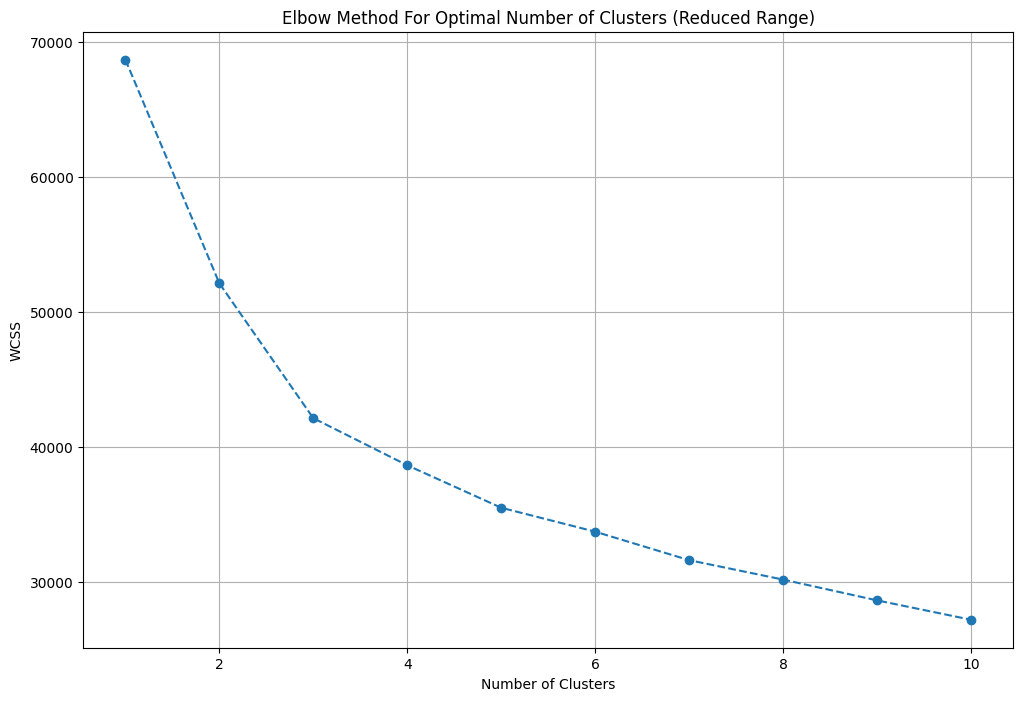

In [399]:
# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(range(1,11), wcss_reduced, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal Number of Clusters (Reduced Range)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [400]:
n_clusters = 3

# Fit the KMeans model
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(scaled_data)

# Predict the cluster assignments for each row
cluster_assignments = kmeans.predict(scaled_data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [401]:
df = df.iloc[:,:-18]

In [402]:
df.head(1)

property_type            society     sector  price  price_per_sqft    area  \
0          flat  dlf regal gardens  sector 90   1.26          7403.0  1702.0   

                                                            areaWithType  \
0  super built up area 1702(158.12 sq.m.)carpet area: 1500(139.35 sq.m.)   

   bedRoom  bathroom balcony additionalRoom  floorNum      facing  \
0        3         3       3         others       6.0  North-East   

    agePossession  \
0  Relatively New   

                                                                                                                                                                                                                                                                                                                                                                                                                                                        nearbyLocations  \
0  ['SS Omnia, Sector 86', 'Numberdar market, IMT Manesar', "Sodhi's Supermarket, Sector 82", 'RPS International School', 'RHM Public School', 'ICICI Bank ATM, Sector 86', 'Silver Streak Multi Speciality', 'Aarvy Healthcare Super Speciality', 'Miracles Apollo Cradle Hospital', 'HDFC Bank, Pataudi Rd', 'Canara Bank - Nawada Fatehpur', 'State Bank of India', 'Minda Industries Nawada Fatehpur', 'Holiday Inn Gurugram Sector 90', 'M3M SCO Shop cum Office']   

                                                                                                                                                                                                                                                  furnishDetails  \
0  ['3 Wardrobe', '5 Fan', '1 Exhaust Fan', '3 Geyser', '9 Light', '1 Chimney', '5 AC', '1 Modular Kitchen', 'No Bed', 'No Curtains', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']   

                                                                           features  \
0  ['Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Park', 'Visitor Parking']   

   super_builtup_area  builtup_area  carpet_area  study room  servant room  \
0              1702.0           NaN       1500.0           0             0   

   store room  pooja room  others  
0           0           0       1

In [403]:
df['furnishing_type'] = cluster_assignments

In [409]:
df.sample(10)[['furnishDetails','furnishing_type']]
# 0 -> unfurnished
# 1 -> semifurnished
# 2 -> furnished

furnishDetails  \
3560     ['3 Wardrobe', '5 Fan', '3 Geyser', '10 Light', '5 AC', '1 Modular Kitchen', '1 Chimney', 'No Bed', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']   
3361  ['4 Fan', '5 Light', '4 AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']   
1404  ['3 Fan', '1 Exhaust Fan', '10 Light', '2 AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']   
3068                                                                                                                                                                                                                                                                  []   
2214        ['4 Wardrobe', '7 Fan', '1 Fridge', '1 Exhaust Fan', '5 Geyser', '1 Stove', '10 Light', '6 AC', '1 Modular Kitchen', '1 Chimney', 'No Bed', 'No Curtains', 'No Dining Table', 'No Microwave', 'No Sofa', 'No TV', 'No Washing Machine', 'No Water Purifier']   
2790       ['4 Wardrobe', '8 Fan', '1 Fridge', '4 Geyser', '1 Washing Machine', '10 Light', '4 AC', '1 Modular Kitchen', '1 Chimney', 'No Bed', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Microwave', 'No Sofa', 'No Stove', 'No TV', 'No Water Purifier']   
405                                                                                                                                                                                                                                                                  NaN   
3324     ['3 Wardrobe', '5 Fan', '1 Exhaust Fan', '1 Geyser', '10 Light', '1 Modular Kitchen', '1 Curtains', 'No AC', 'No Bed', 'No Chimney', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']   
253                                                                                                                                                                                                                                                                  NaN   
2096        ['3 Wardrobe', '1 Water Purifier', '5 Fan', '1 Exhaust Fan', '4 Geyser', '1 Stove', '15 Light', '4 AC', '1 Modular Kitchen', '1 Chimney', 'No Bed', 'No Curtains', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No TV', 'No Washing Machine']   

      furnishing_type  
3560                1  
3361                0  
1404                0  
3068                0  
2214                1  
2790                2  
405                 0  
3324                1  
253                 0  
2096                1

# 5) 'features' feature

In [410]:
df[['society','features']].sample(5)

society  \
1556     puri emerald bay   
159    surendra avenue 69   
2602  aipl zen residences   
937            m3m merlin   
985           m3m capital   

                                                                                                                                                                                                                                                                                                                                                                                                                                                    features  
1556  ['Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Visitor Parking', 'Swimming Pool', 'Park', 'Internet/wi-fi connectivity', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center', 'Water softening plant']  
159                                                                                                                                                                                                                                                                                                                                                                                                                                                      NaN  
2602                                                                                                         ['Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'Centrally Air Conditioned', 'Maintenance Staff', 'Water Storage', 'No open drainage around', 'Piped-gas', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Low Density Society', 'Fitness Centre / GYM', 'Waste Disposal', 'Club house / Community Center']  
937                                                                                                                                                                                                                                                                                               ['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']  
985                                                                        ['Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'Centrally Air Conditioned', 'Maintenance Staff', 'Water Storage', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Shopping Centre', 'Fitness Centre / GYM', 'Waste Disposal', 'Club house / Community Center']

In [411]:
df['features'].isnull().sum()

667

In [412]:
app_df = pd.read_csv('/content/drive/MyDrive/Capstone_Project_REAL_ESTATE/appartments.csv')

In [413]:
app_df.head(2)

PropertyName                               PropertySubName  \
0  Smartworld One DXP  2, 3, 4 BHK Apartment in Sector 113, Gurgaon   
1           M3M Crown     3, 4 BHK Apartment in Sector 111, Gurgaon   

                                                                                                                                  NearbyLocations  \
0                                           ['Bajghera Road', 'Palam Vihar Halt', 'DPSG Palam Vihar', 'Park Hospital', 'Gurgaon Railway Station']   
1  ['DPSG Palam Vihar Gurugram', 'The NorthCap University', 'Park Hospital, Palam Vihar', 'Pacific D21 Mall', 'Palam Vihar Halt Railway Station']   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    LocationAdvantages  \
0         {'Bajghera Road': '800 Meter', 'Palam Vihar Halt': '2.5 KM', 'DPSG Palam Vihar': '3.1 KM', 'Park Hospital': '3.1 KM', 'Gurgaon Railway Station': '4.9 KM', 'The NorthCap University': '5.4 KM', 'Dwarka Expy': '1.2 KM', 'Hyatt Place Gurgaon Udyog Vihar': '7.7 KM', 'Dwarka Sector 21, Metro Station': '7.2 KM', 'Pacific D21 Mall': '7.4 KM', 'Indira Gandhi International Airport': '14.7 KM', 'Hamoni Golf Camp': '6.2 KM', 'Fun N Food Waterpark': '8.8 KM', 'Accenture DDC5': '9 KM'}   
1  {'DPSG Palam Vihar Gurugram': '1.4 Km', 'The NorthCap University': '4.4 Km', 'Park Hospital, Palam Vihar': '1.4 Km', 'Pacific D21 Mall': '8.2 Km', 'Palam Vihar Halt Railway Station': '1.2 Km', 'Dwarka Sector 21 Metro Station': '8.1 Km', 'Dwarka Expressway': '450 m', 'Fun N Food Water Park': '8.1 Km', 'Indira Gandhi International Airport': '14.1 Km', 'Tau DeviLal Sports Complex': '11.2 Km', 'Hamoni Golf Camp': '5 Km', 'Hyatt Place': '6.1 Km', 'Altrade Business Centre': '11.2 Km'}   

                                                                          Link  \
0  https://www.99acres.com/smartworld-one-dxp-sector-113-gurgaon-npxid-r400415   
1           https://www.99acres.com/m3m-crown-sector-111-gurgaon-npxid-r404068   

                                                                                                                                                                                                                                                                                                                                                                                           PriceDetails  \
0  {'2 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '1,370 sq.ft.', 'price-range': '₹ 2 - 2.4 Cr'}, '3 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '1,850 - 2,050 sq.ft.', 'price-range': '₹ 2.25 - 3.59 Cr'}, '4 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '2,600 sq.ft.', 'price-range': '₹ 3.24 - 4.56 Cr'}}   
1                                                                                                       {'3 BHK': {'building_type': 'Apartment', 'area_type': 'Super Built-up Area', 'area': '1,605 - 2,170 sq.ft.', 'price-range': '₹ 2.2 - 3.03 Cr'}, '4 BHK': {'building_type': 'Apartment', 'area_type': 'Super Built-up Area', 'area': '2,248 - 2,670 sq.ft.', 'price-range': '₹ 3.08 - 3.73 Cr'}}   

                                                                                                                                   TopFacilities  
0                     ['Swimming Pool', 'Salon', 'Restaurant', 'Spa', 'Cafeteria', 'Sun Deck', '24x7 Security', 'Club House', 'Gated Community']  
1  ['Bowling Alley', 'Mini Theatre', 'Manicured Garden', 'Swimming Pool', 'Flower Garden', 'Reading Lounge', 'Golf Course', 'Barbecue', 'Sauna']

In [414]:
app_df['PropertyName'] = app_df['PropertyName'].str.lower()

In [415]:
temp_df = df[df['features'].isnull()]

In [416]:
temp_df.shape

(667, 26)

In [417]:
x = temp_df.merge(app_df,left_on='society',right_on='PropertyName',how='left')['TopFacilities']

In [418]:
df.loc[temp_df.index,'features'] = x.values

In [419]:
df['features'].isnull().sum()

523

In [420]:
from sklearn.preprocessing import MultiLabelBinarizer
import ast

In [421]:
# Convert the string representation of lists in the 'features' column to actual lists
df['features_list'] = df['features'].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) and x.startswith('[') else [])

# Use MultiLabelBinarizer to convert the features list into a binary matrix
mlb = MultiLabelBinarizer()
features_binary_matrix = mlb.fit_transform(df['features_list'])

# Convert the binary matrix into a DataFrame
features_binary_df = pd.DataFrame(features_binary_matrix, columns=mlb.classes_)

In [422]:
features_binary_df.sample(5)

24/7 Power Backup  24/7 Water Supply  24x7 Security  ATM  \
916                   0                  0              0    0   
2712                  0                  0              0    0   
1393                  0                  0              0    0   
1366                  0                  0              0    0   
2860                  0                  0              0    0   

      Aerobics Centre  Air Hockey  Airy Rooms  Amphitheatre  \
916                 0           0           1             0   
2712                0           0           0             0   
1393                0           0           0             0   
1366                0           0           0             0   
2860                0           0           1             0   

      Automated Car Wash  Badminton Court  Bank Attached Property  \
916                    0                0                       1   
2712                   0                0                       0   
1393                   0                0                       0   
1366                   0                0                       1   
2860                   0                0                       1   

      Banquet Hall  Bar/Chill-Out Lounge  Barbecue  Basketball Court  \
916              0                     0         0                 0   
2712             0                     0         0                 0   
1393             0                     0         0                 0   
1366             0                     0         0                 0   
2860             0                     0         0                 0   

      Beach Volley Ball Court  Billiards  Bowling Alley  Bus Shelter  \
916                         0          0              0            0   
2712                        0          0              0            0   
1393                        0          0              0            0   
1366                        0          0              0            0   
2860                        0          0              0            0   

      Business Lounge  CCTV Camera Security  Cafeteria  Car Parking  \
916                 0                     0          0            0   
2712                0                     0          0            0   
1393                0                     0          0            0   
1366                0                     0          0            0   
2860                0                     0          0            0   

      Car wash area  Card Room  Centrally Air Conditioned  Changing Area  \
916               0          0                          1              0   
2712              0          0                          0              0   
1393              0          0                          0              0   
1366              0          0                          0              0   
2860              0          0                          0              0   

      Children's Play Area  Cigar Lounge  Clinic  Club House  \
916                      0             0       0           0   
2712                     0             0       0           0   
1393                     0             0       0           0   
1366                     0             0       0           0   
2860                     0             0       0           0   

      Club house / Community Center  Community Hall  Concierge Service  \
916                               1               0                  0   
2712                              1               0                  0   
1393                              1               0                  0   
1366                              1               0                  0   
2860                              1               0                  0   

      Conference room  Creche/Day care  Cricket Pitch  Doctor on Call  \
916                 0                0              0               0   
2712                0                0              0               0   
1393            

In [423]:
features_binary_df.shape

(3817, 130)

In [424]:
wcss_reduced = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(features_binary_df)
    wcss_reduced.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

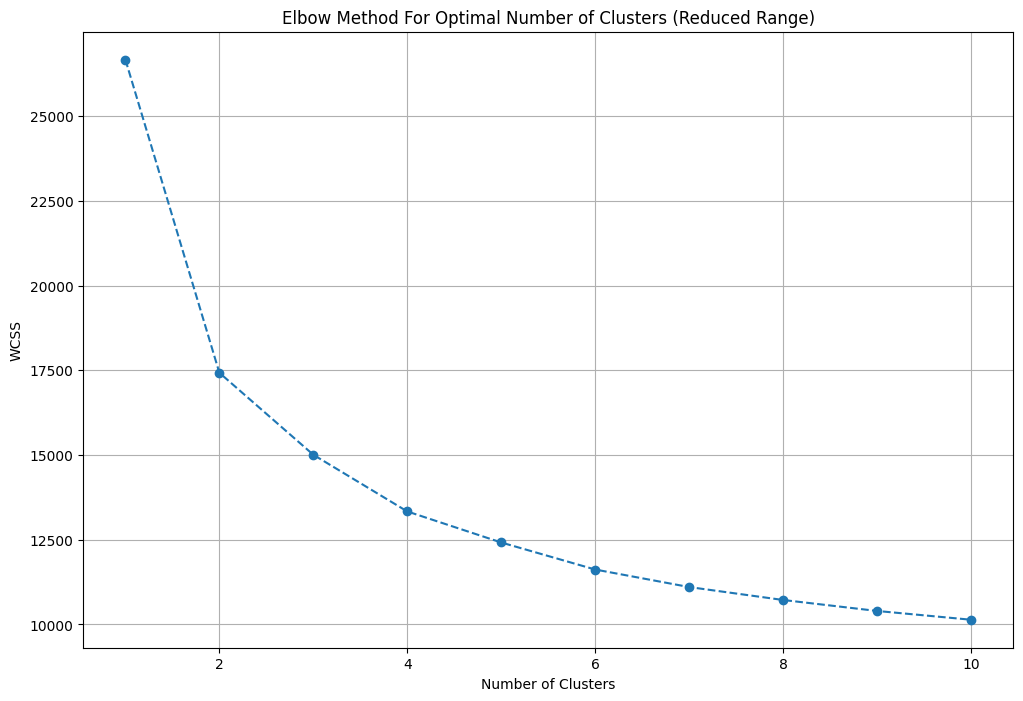

In [425]:
# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(range(1,11), wcss_reduced, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal Number of Clusters (Reduced Range)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [427]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(features_binary_df)

In [428]:
n_clusters = 3

# Fit the KMeans model
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(scaled_data)

# Predict the cluster assignments for each row
cluster_assignments = kmeans.predict(scaled_data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [430]:
df['luxury_category'] = cluster_assignments

In [434]:
df.sample(10)[['features','luxury_category']]
# 0 -> basic
# 1 -> semi-luxury
# 2 -> high luxury

# K-means clustering not suitable for this feature

features  \
3431                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               ['Feng Shui / Vaastu Compliant', 'Maintenance Staff', 'Park', 'Rain Water Harvesting']   
2824                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         ['Lift(s)', 'Water Storage']   
2988  ['Centrally Air Conditioned', 'Water purifier', 'Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Bank Attached Property', 'Piped-gas', 'Internet/wi-fi connectivity', 'Recently Renovated', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']   
2049                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  NaN   
1956                                                                                                                                                                                                                                                                                                     ['Security / Fire Alarm', 'Power Back-up', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Bank Attached Property', 'Piped-gas', 'Visitor Parking', 'Swimming Pool', 'Park', 'Natural Light', 'Airy Rooms', 'Low Density Society', 'Shopping Centre', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center']   
1292                                                                                                                                                                                                                                                                                                                                                                                                                                                            ['Power Back-up', 'Intercom Facilit

In [435]:
# Define the weights for each feature as provided
# Assigning weights based on perceived luxury contribution
weights = {
    '24/7 Power Backup': 8,
    '24/7 Water Supply': 4,
    '24x7 Security': 7,
    'ATM': 4,
    'Aerobics Centre': 6,
    'Airy Rooms': 8,
    'Amphitheatre': 7,
    'Badminton Court': 7,
    'Banquet Hall': 8,
    'Bar/Chill-Out Lounge': 9,
    'Barbecue': 7,
    'Basketball Court': 7,
    'Billiards': 7,
    'Bowling Alley': 8,
    'Business Lounge': 9,
    'CCTV Camera Security': 8,
    'Cafeteria': 6,
    'Car Parking': 6,
    'Card Room': 6,
    'Centrally Air Conditioned': 9,
    'Changing Area': 6,
    "Children's Play Area": 7,
    'Cigar Lounge': 9,
    'Clinic': 5,
    'Club House': 9,
    'Concierge Service': 9,
    'Conference room': 8,
    'Creche/Day care': 7,
    'Cricket Pitch': 7,
    'Doctor on Call': 6,
    'Earthquake Resistant': 5,
    'Entrance Lobby': 7,
    'False Ceiling Lighting': 6,
    'Feng Shui / Vaastu Compliant': 5,
    'Fire Fighting Systems': 8,
    'Fitness Centre / GYM': 8,
    'Flower Garden': 7,
    'Food Court': 6,
    'Foosball': 5,
    'Football': 7,
    'Fountain': 7,
    'Gated Community': 7,
    'Golf Course': 10,
    'Grocery Shop': 6,
    'Gymnasium': 8,
    'High Ceiling Height': 8,
    'High Speed Elevators': 8,
    'Infinity Pool': 9,
    'Intercom Facility': 7,
    'Internal Street Lights': 6,
    'Internet/wi-fi connectivity': 7,
    'Jacuzzi': 9,
    'Jogging Track': 7,
    'Landscape Garden': 8,
    'Laundry': 6,
    'Lawn Tennis Court': 8,
    'Library': 8,
    'Lounge': 8,
    'Low Density Society': 7,
    'Maintenance Staff': 6,
    'Manicured Garden': 7,
    'Medical Centre': 5,
    'Milk Booth': 4,
    'Mini Theatre': 9,
    'Multipurpose Court': 7,
    'Multipurpose Hall': 7,
    'Natural Light': 8,
    'Natural Pond': 7,
    'Park': 8,
    'Party Lawn': 8,
    'Piped Gas': 7,
    'Pool Table': 7,
    'Power Back up Lift': 8,
    'Private Garden / Terrace': 9,
    'Property Staff': 7,
    'RO System': 7,
    'Rain Water Harvesting': 7,
    'Reading Lounge': 8,
    'Restaurant': 8,
    'Salon': 8,
    'Sauna': 9,
    'Security / Fire Alarm': 9,
    'Security Personnel': 9,
    'Separate entry for servant room': 8,
    'Sewage Treatment Plant': 6,
    'Shopping Centre': 7,
    'Skating Rink': 7,
    'Solar Lighting': 6,
    'Solar Water Heating': 7,
    'Spa': 9,
    'Spacious Interiors': 9,
    'Squash Court': 8,
    'Steam Room': 9,
    'Sun Deck': 8,
    'Swimming Pool': 8,
    'Temple': 5,
    'Theatre': 9,
    'Toddler Pool': 7,
    'Valet Parking': 9,
    'Video Door Security': 9,
    'Visitor Parking': 7,
    'Water Softener Plant': 7,
    'Water Storage': 7,
    'Water purifier': 7,
    'Yoga/Meditation Area': 7
}
# Calculate luxury score for each row
luxury_score = features_binary_df[list(weights.keys())].multiply(list(weights.values())).sum(axis=1)


In [436]:
df['luxury_score'] = luxury_score

In [437]:
df.head(2)

property_type            society     sector  price  price_per_sqft    area  \
0          flat  dlf regal gardens  sector 90   1.26          7403.0  1702.0   
1          flat       tulip violet  sector 69   1.72          8730.0  1970.0   

                                                            areaWithType  \
0  super built up area 1702(158.12 sq.m.)carpet area: 1500(139.35 sq.m.)   
1                                 super built up area 1970(183.02 sq.m.)   

   bedRoom  bathroom balcony additionalRoom  floorNum      facing  \
0        3         3       3         others       6.0  North-East   
1        4         4       1  not available      12.0  North-East   

    agePossession  \
0  Relatively New   
1  Relatively New   

                                                                                                                                                                                                                                                                                                                                                                                                                                                        nearbyLocations  \
0  ['SS Omnia, Sector 86', 'Numberdar market, IMT Manesar', "Sodhi's Supermarket, Sector 82", 'RPS International School', 'RHM Public School', 'ICICI Bank ATM, Sector 86', 'Silver Streak Multi Speciality', 'Aarvy Healthcare Super Speciality', 'Miracles Apollo Cradle Hospital', 'HDFC Bank, Pataudi Rd', 'Canara Bank - Nawada Fatehpur', 'State Bank of India', 'Minda Industries Nawada Fatehpur', 'Holiday Inn Gurugram Sector 90', 'M3M SCO Shop cum Office']   
1                                                                                                                                                                                    ['Airia Mall Sector 68', 'Southern Peripheral Road', 'Golf Course Extension Rd', 'Imperio School', 'DPG Institute of Technology', 'Ektaa Hospitals', 'Indira Gandhi International Airport', 'Vipul Trade Business Centre', 'Radisson Hotel Gurugram', 'SkyJumper Trampoline Park']   

                                                                                                                                                                                                                                                         furnishDetails  \
0         ['3 Wardrobe', '5 Fan', '1 Exhaust Fan', '3 Geyser', '9 Light', '1 Chimney', '5 AC', '1 Modular Kitchen', 'No Bed', 'No Curtains', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']   
1  ['1 Modular Kitchen', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Light', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']   

                                                                                                                                                                                                                                                                                                                                       features  \
0                                                                                                                                                                                                                                                              ['Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Park', 'Visitor Parking']   
1  ['Power Back-up', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Piped-gas', 'Visitor Parking', 'Swimming Pool', 'Park', 'Natural Light', 'Airy Rooms', 'Low Density Society', 'Shopping Centre', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center']   

   super_builtup_area  builtup_area  carpet_area  study room  

In [438]:
# cols to drop -> nearbyLocations,furnishDetails, features,features_list, additionalRoom
df.drop(columns=['nearbyLocations','furnishDetails','features','features_list','additionalRoom','luxury_category'],inplace=True)

In [439]:
df.shape

(3817, 23)

In [440]:
from pathlib import Path

In [441]:
filepath = Path('/content/drive/MyDrive/Capstone_Project_REAL_ESTATE/gurgaon_real_estate_cleaned_ver2.csv')

In [442]:
df.to_csv(filepath,index=False)